# Predictions for Eerie on March 1, 2023

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet
from sklearn.cluster import KMeans

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('../data/cleaned.csv')


## Generate Prophet Model to Predict num_results

In [3]:
df_numpeople_predict = df[["date", "num_results"]]
df_numpeople_predict.columns = ['ds', 'y']
m = Prophet()
m.fit(df_numpeople_predict)

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)


12:18:21 - cmdstanpy - INFO - Chain [1] start processing
12:18:21 - cmdstanpy - INFO - Chain [1] done processing


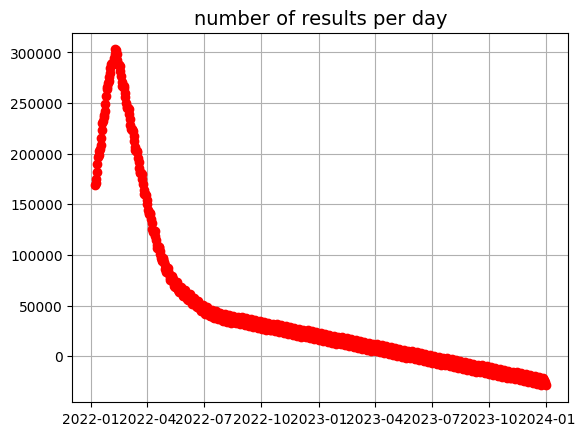

In [4]:
plt.plot(forecast['ds'], forecast['yhat'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()


In [5]:
# Predict March 1 2023 
forecast[forecast.ds == "2023-03-01"]['yhat']


418    15972.784783
Name: yhat, dtype: float64

## Generate Prophet Model to Predict num_hardmode

15:28:23 - cmdstanpy - INFO - Chain [1] start processing
15:28:23 - cmdstanpy - INFO - Chain [1] done processing


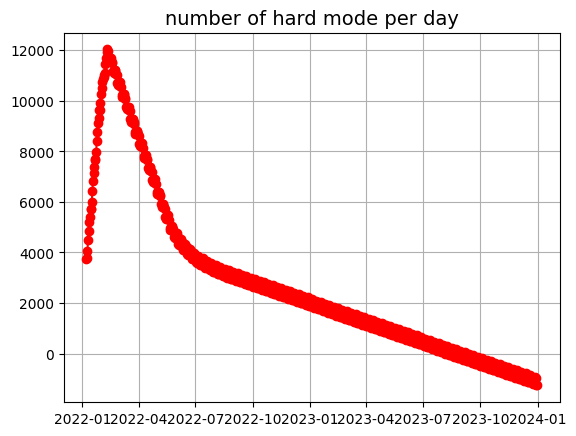

418    1677.402674
Name: yhat, dtype: float64

In [ ]:
df_numpeople_predict = df[["date", "num_hardmode"]]
df_numpeople_predict.columns = ['ds', 'y']
m = Prophet()
m.fit(df_numpeople_predict)

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)
forecast.tail()

plt.plot(forecast['ds'], forecast['yhat'], color='red', marker='o')
plt.title('number of hard mode per day', fontsize=14)
plt.grid(True)
plt.show()

# Predict March 1 2023

forecast[forecast.ds == "2023-03-01"]['yhat']


## Create Clustering

Cluster 0
Mean word score results: 1.6004868111038284
Mean average number of guesses: 3.7615789473684225
Mean word occurrence: 0.02739264257086536


Cluster 1
Mean word score results: 1.3261015574798811
Mean average number of guesses: 4.72875
Mean word occurrence: 0.005450028919988113


Cluster 2
Mean word score results: 1.348062712279306
Mean average number of guesses: 4.156647727272727
Mean word occurrence: 0.012115481664328671




c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp\ipykernel_23300\1322580350.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans['cluster'] = labels


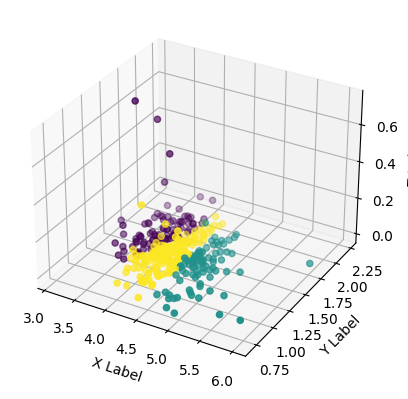

In [6]:
df_kmeans = df[["word_score", "avg_num_guesses", "word_occurrence"]]
# word_score,avg_num_guesses,word_occurrence
kmeans = KMeans(n_clusters=3).fit(df_kmeans)

# Predict the cluster labels for each data point
labels = kmeans.predict(df_kmeans)

# Add the cluster labels to the data
df_kmeans['cluster'] = labels

# Print the summary statistics for each cluster
for i in range(3):
    cluster_data = df_kmeans[df_kmeans['cluster'] == i]
    print('Cluster', i)
    print('Mean word score results:',
          cluster_data['word_score'].mean())
    print('Mean average number of guesses:',
          cluster_data['avg_num_guesses'].mean())
    print('Mean word occurrence:',
          cluster_data['word_occurrence'].mean())
    print('\n')


# Create a figure and a 3D axes object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the scatter points
ax.scatter(df_kmeans['avg_num_guesses'],
           df_kmeans['word_score'],
           df_kmeans['word_occurrence'],
           c=df_kmeans['cluster'])

# Set the axis labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()

## Make Predictions on guesses of Eerie

In [7]:
from util import *

df_rf, df_lr = predict_word("eerie")
display(df_rf)
display(df_lr)


,word,word_score,word_occurrence,vowels,repeats,letter1_int,letter2_int,letter3_int,letter4_int,letter5_int,avg_num_guesses,in1,in2,in3,in4,in5,in6,over6
0,eerie,2.117805,0.000573,4,2,0,0,4,5,0,4.454405,0.195801,2.909752,16.475656,32.943021,29.43721,15.14887,2.834606


,word,word_score,word_occurrence,vowels,repeats,letter1_int,letter2_int,letter3_int,letter4_int,letter5_int,avg_num_guesses,in1,in2,in3,in4,in5,in6,over6
0,eerie,2.117805,0.000573,4,2,0,0,4,5,0,4.525076,0.118856,2.665775,14.913053,31.905483,30.616744,16.154875,3.617306
